In [1]:
# Import modules 
import sys
from os import getcwd
from os.path import dirname, join
path = dirname(dirname(getcwd()))
sys.path.append(path)

In [7]:
from MintPy.interpret_toolkit import InterpretToolkit
from MintPy.utils import (combine_top_features, 
                          load_pickle)
import plotting_config
import pandas as pd
import numpy as np
from joblib import load
import shap
import matplotlib.pyplot as plt

'0.35.0'

In [3]:
# Load the model objects. In this case, we are using two popular scikit-learn tree-based methods.
model_filepath = join(getcwd(), 'models')
model_fname = ['RandomForestClassifier.pkl']#,  'GradientBoostingClassifier.pkl']
model_names = ['Random Forest']#, 'Gradient Boosting']
model_objs = [load(join(model_filepath, fname)) for fname in model_fname]

#Import the training dataset
data_filename = join(getcwd(), 'data', 'data_for_mintpy.csv')

# Load the examples the models were trained on.
TARGET_COLUMN = 'cat_rt'
data  = pd.read_csv(data_filename)

examples = data[plotting_config.cols_to_use]
targets = data[TARGET_COLUMN].values

In [4]:
examples_subset = shap.sample(examples, 5)
myInterpreter = InterpretToolkit(model=model_objs, 
                                 model_names=model_names,
                                 examples=examples_subset, 
                                 targets=targets,
                                )

## Summary Plot

In [5]:
"""
myInterpreter.plot_shap(features=None,
                        display_feature_names = plotting_config.pretty_names,
                        plot_type='summary', 
                        data_for_shap=examples, 
                        subsample_size=100)
"""

"\nmyInterpreter.plot_shap(features=None,\n                        display_feature_names = plotting_config.pretty_names,\n                        plot_type='summary', \n                        data_for_shap=examples, \n                        subsample_size=100)\n"

## Dependence Plot 

subsample_size: 100
subsample_method: kmean



4
Processing :  swave_flux


TypeError: dependence_plot() missing 1 required positional argument: 'ind'

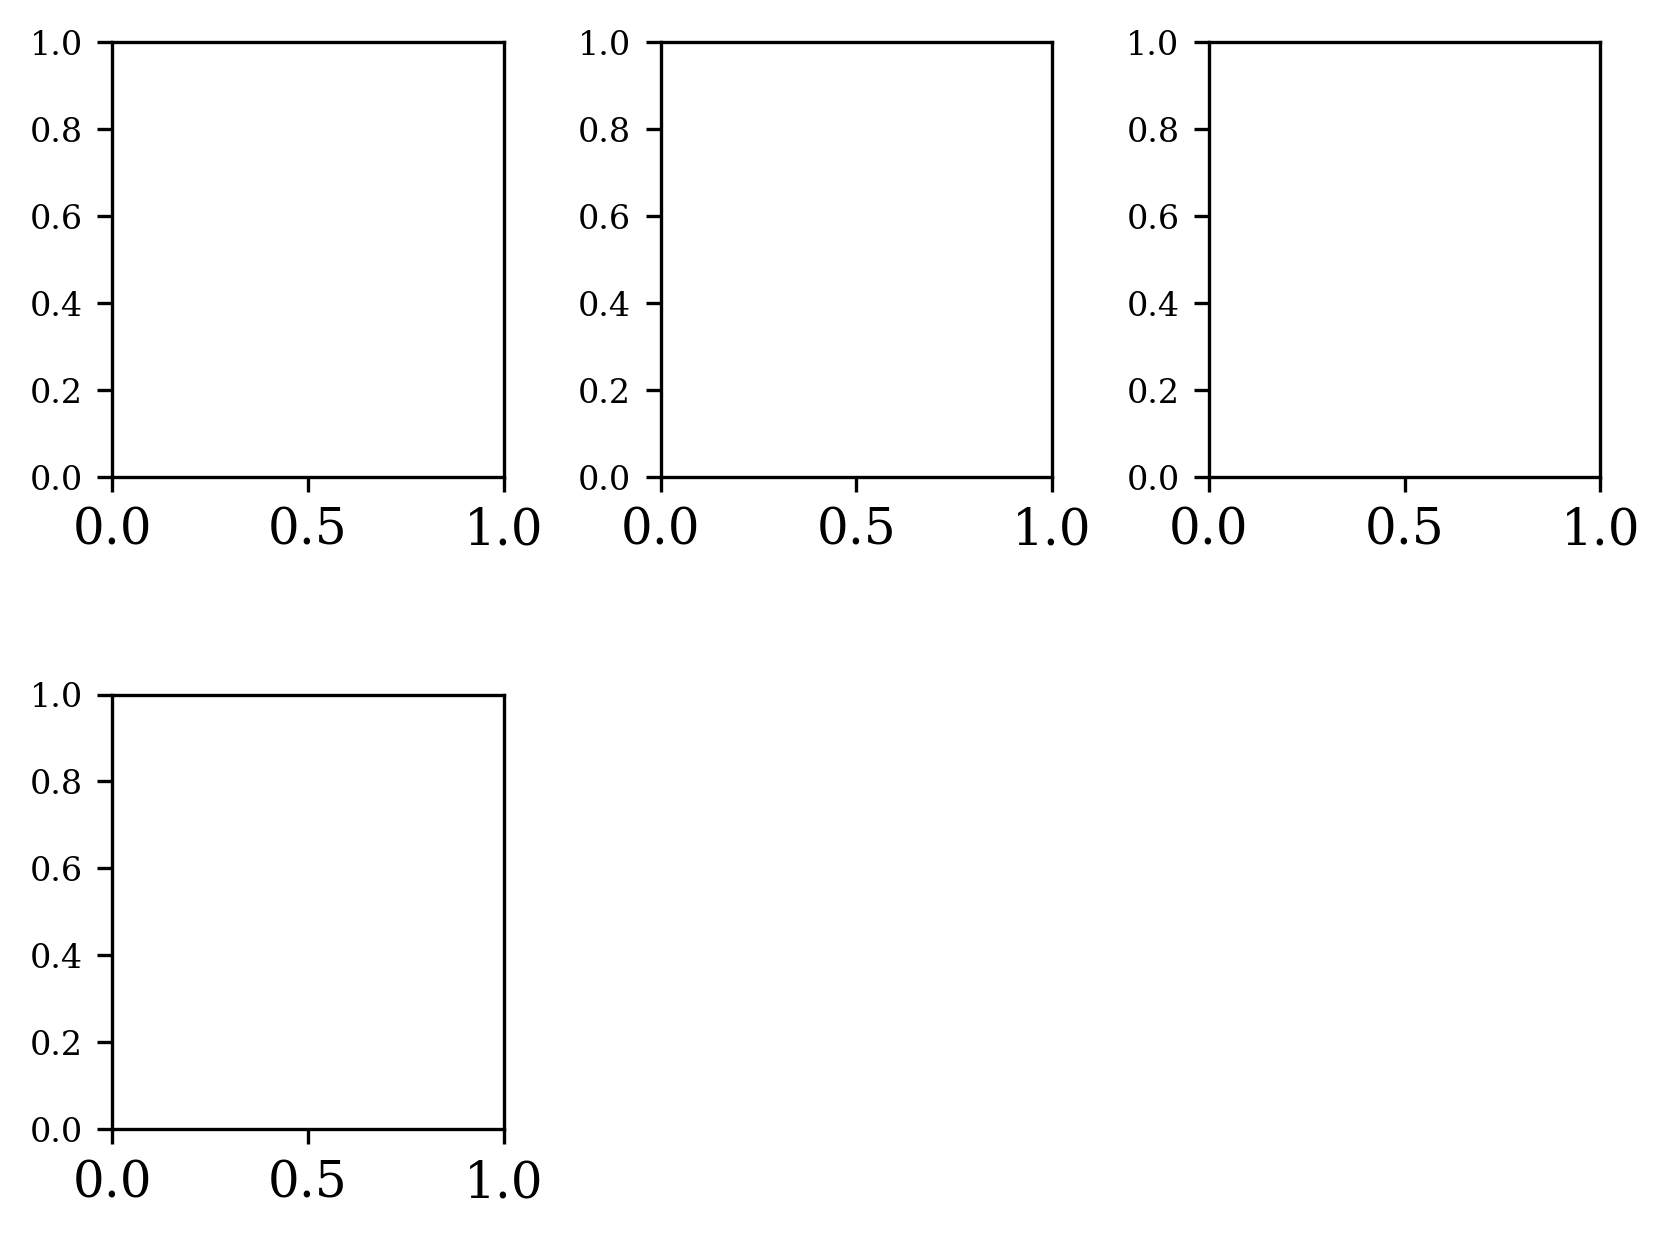

In [6]:
features = ['swave_flux', 'sfcT_hrs_ab_frez', 'tmp2m_hrs_bl_frez', 'temp2m']
myInterpreter.plot_shap(features=features,
                        display_feature_names = plotting_config.pretty_names,
                        plot_type='dependence', 
                        data_for_shap=examples, 
                        subsample_size=100)